# Results and charts

This is a dirty draft and it requires some trimming.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import os

alpha = 0.05

d = pd.read_csv(os.path.join("..", "data", "data.csv"), index_col=0)
#d = pd.read_csv(os.path.join("..", "data", "data_outliers-replaced.csv"), index_col=0)
st = pd.read_csv(os.path.join("..", "data", "data_aggregated.csv"), index_col=0)
#st = pd.read_csv(os.path.join("..", "data", "data_outliers-replaced_aggregated.csv"), index_col=0)

print("Loading:", len(d), "lines", len(d["ParticipantID"].unique()), "participants")

Loading: 15768 lines 219 participants


In [6]:
# comparison by design training

types = ["lexical", "recognition"]
fonts = ["arial", "sansforgetica"]
skills = ["Designer", "Non-designer"]
metrics = ["RT", "RT_word", "RT_nonword", "AUC", "AUC_word", "AUC_nonword"]
RTs = metrics[:3]
AUCs = metrics[3:]

cols = pd.MultiIndex.from_product([skills, metrics, ["mean", "SEM"]], names=["skill", "metric", "stat"])
ix = pd.MultiIndex.from_product([[1, 2], types, fonts], names=["sid", "type", "font"])
res = pd.DataFrame(columns=cols, index=ix)

for sid, t, font in res.index:
    for skill in skills:
        if skill == "Designer":
            r = st[st["isDesigner"] & (st["Font"] == font) & (st["Type"] == t) & (st["StudyID"] == sid)]
        else:
            r = st[(st["isDesigner"] == False) & (st["Font"] == font) & (st["Type"] == t) & (st["StudyID"] == sid)]
        for metric in metrics:
            res.loc[(sid, t, font), (skill, metric, "mean")] = r[metric].mean()
            res.loc[(sid, t, font), (skill, metric, "SEM")] = r[metric].sem()
display(res)
path = os.path.join("..", "data", "results", "means-by-design-expertise.csv")
res.to_csv(path)
print("Saved to:", path)

skill                         Designer                                   \
metric                              RT          RT_word      RT_nonword   
stat                              mean      SEM    mean  SEM       mean   
sid type        font                                                      
1   lexical     arial          3397.45  842.777     NaN  NaN        NaN   
                sansforgetica  3035.93  322.033     NaN  NaN        NaN   
    recognition arial          2454.94  115.525     NaN  NaN    2612.47   
                sansforgetica   2588.1  120.122     NaN  NaN    2767.94   
2   lexical     arial          2595.74  143.442     NaN  NaN        NaN   
                sansforgetica  3106.71   189.35     NaN  NaN        NaN   
    recognition arial          2537.54  103.366     NaN  NaN    2735.26   
                sansforgetica  20745.4  18054.6     NaN  NaN      39114   

skill                                                                   \
metric                                       AUC              AUC_word   
stat                               SEM      mean         SEM      mean   
sid type        font                                                     
1   lexical     arial              NaN  0.971792    0.006492       NaN   
                sansforgetica      NaN  0.979434  0.00528001       NaN   
    recognition arial          153.811  0.896521   0.0146142  0.880307   
                sansforgetica  159.232  0.890478   0.0161991  0.870283   
2   lexical     arial              NaN  0.941111   0.0135209       NaN   
                sansforgetica      NaN  0.928571    0.015384       NaN   
    recognition arial          142.221  0.842262   0.0170546  0.850198   
                sansforgetica  36113.7  0.847718   0.0171733  0.865575   

skill                                     ... Non-designer                  \
metric                                    ...      RT_word      RT_nonword   
stat                                 SEM  ...         mean  SEM       mean   
sid type        font                      ...                                
1   lexical     arial                NaN  ...          NaN  NaN        NaN   
                sansforgetica        NaN  ...          NaN  NaN        NaN   
    recognition arial           0.018187  ...          NaN  NaN    2996.64   
                sansforgetica  0.0213533  ...          NaN  NaN    3133.56   
2   lexical     arial                NaN  ...          NaN  NaN        NaN   
                sansforgetica        NaN  ...          NaN  NaN        NaN   
    recognition arial          0.0210145  ...          NaN  NaN    2798.37   
                sansforgetica   0.019009  ...          NaN  NaN    2987.47   

skill                                                                   \
metric                                       AUC              AUC_word   
stat                               SEM      mean         SEM      mean   
sid type        font                                                     
1   lexical     arial              NaN  0.973182  0.00716037       NaN   
                sansforgetica      NaN     0.975  0.00788058       NaN   
    recognition arial          270.869  0.901989   0.0154599  0.898438   
                sansforgetica  143.908  0.916016   0.0124777  0.901989   
2   lexical     arial              NaN  0.967881  0.00831703       NaN   
                sansforgetica      NaN  0.978475  0.00556332       NaN   
    recognition arial          118.446  0.893935   0.0143146  0.872881   
                sansforgetica  118.502  0.869306   0.0152657  0.861758   

skill                                                            
metric                                   AUC_nonword             
stat                                 SEM        mean        SEM  
sid type        font                                             
1   lexical     arial                NaN         NaN        NaN  
                sansforgetica        NaN         NaN  

Saved to: ../data/results/means-by-design-expertise.csv


Saved to: ../data/results/means-by-design-expertise.pdf


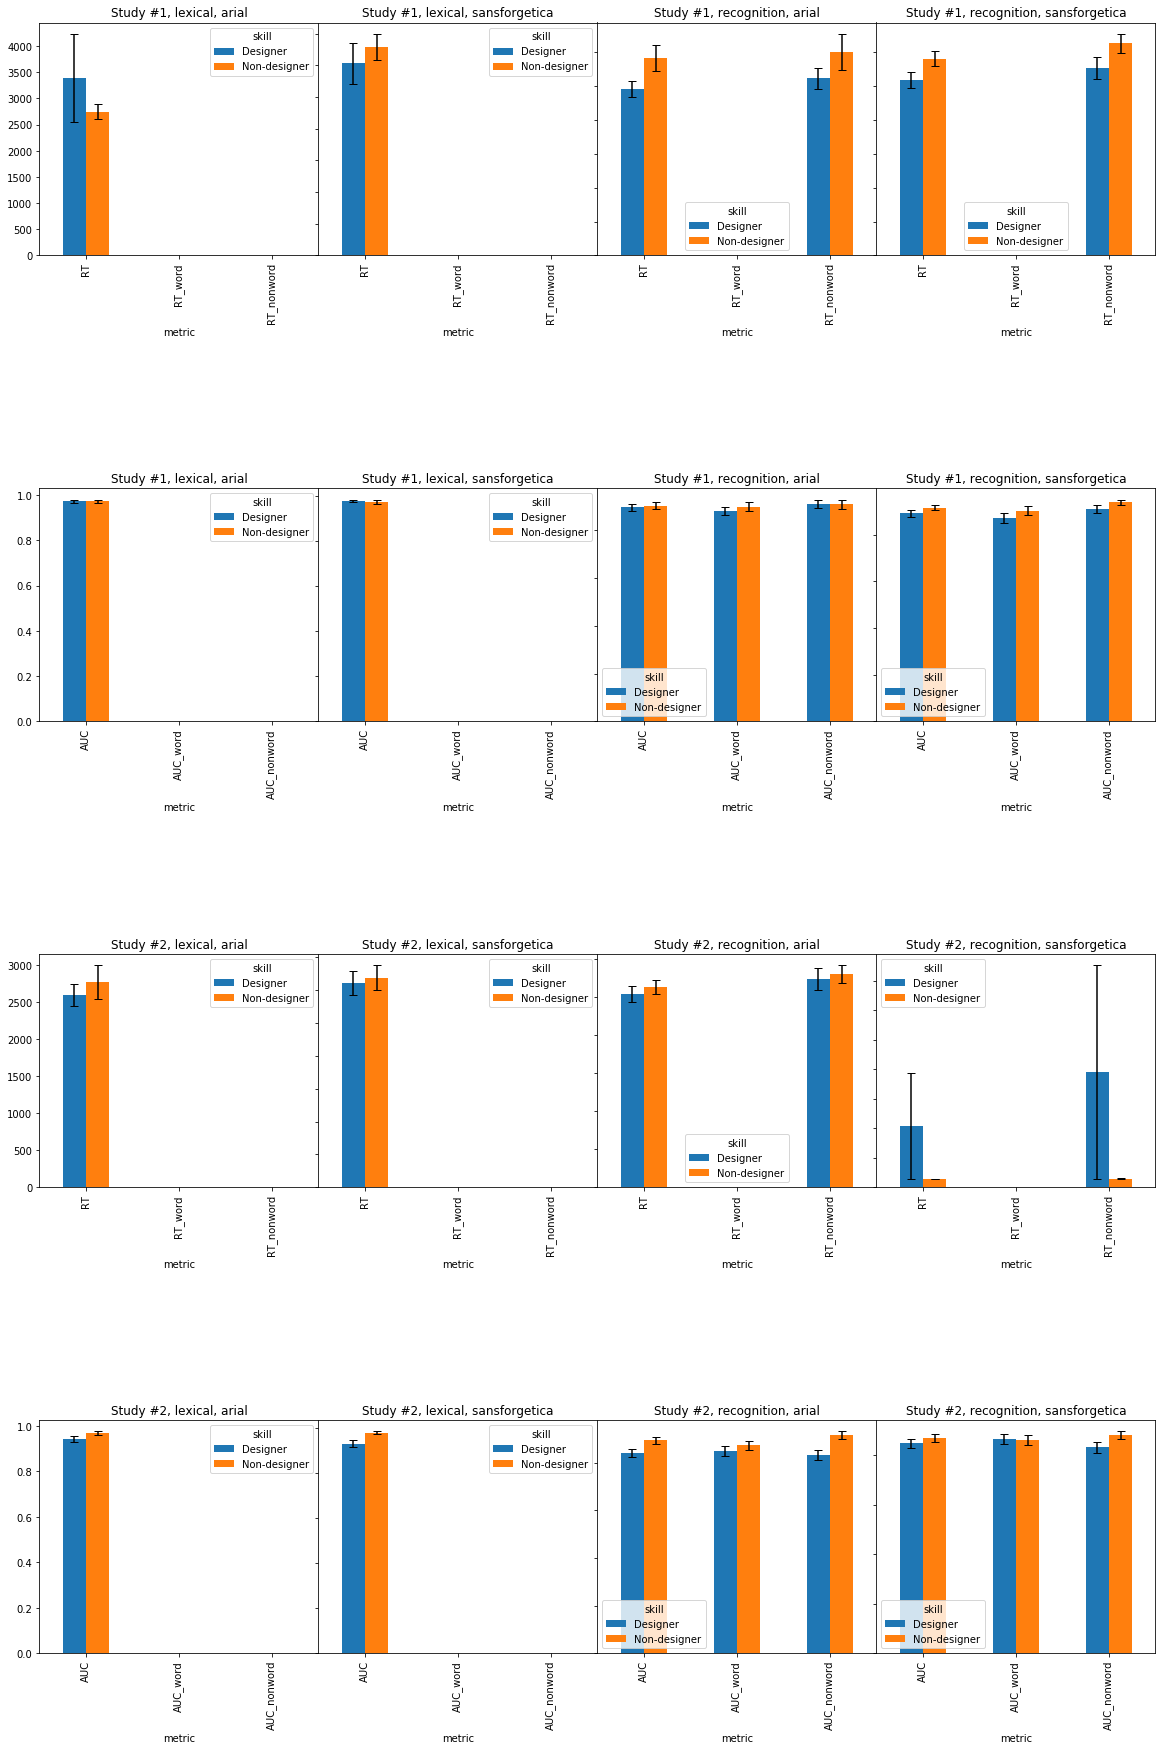

In [7]:
# comparison by design training - charts

res_ = res.reorder_levels([2, 1, 0], axis=1).copy()
fig, axes = plt.subplots(4, 4, figsize=(20, 30))
plt.subplots_adjust(wspace=0, hspace=1)

res_ = res_.T.unstack()

combinations = [(t, f) for t in types for f in fonts]

for sid in [1, 2]:
    for i, (t, font) in enumerate(combinations):
        line = (sid - 1) * 2
        combo = (sid, t, font)
        means = res_.loc[("mean", ), combo].loc[RTs]
        errors = res_.loc[("SEM", ), combo].loc[RTs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)
        means = res_.loc[("mean", ), combo].loc[AUCs]
        errors = res_.loc[("SEM", ), combo].loc[AUCs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line+1][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)

path = os.path.join("..", "data", "results", "means-by-design-expertise.pdf")
fig.savefig(path)
print("Saved to:", path)

In [8]:
# comparison by order

cols = pd.MultiIndex.from_product([[1, 2], metrics, ["mean", "SEM"]], names=["order", "metric", "stat"])
ix = pd.MultiIndex.from_product([[1, 2], types, fonts], names=["sid", "type", "font"])
res = pd.DataFrame(columns=cols, index=ix)

for sid, t, font in res.index:
    for order in [1, 2]:
        r = st[(st["Order"] == order) & (st["Font"] == font) & (st["Type"] == t) & (st["StudyID"] == sid)]
        for metric in metrics:
            res.loc[(sid, t, font), (order, metric, "mean")] = r[metric].mean()
            res.loc[(sid, t, font), (order, metric, "SEM")] = r[metric].sem()
display(res)
path = os.path.join("..", "data", "results", "means-by-order.csv")
res.to_csv(path)
print("Saved to:", path)

order                                1                                   \
metric                              RT          RT_word      RT_nonword   
stat                              mean      SEM    mean  SEM       mean   
sid type        font                                                      
1   lexical     arial          3103.73  464.354     NaN  NaN        NaN   
                sansforgetica  3154.48  198.613     NaN  NaN        NaN   
    recognition arial              NaN      NaN     NaN  NaN        NaN   
                sansforgetica      NaN      NaN     NaN  NaN        NaN   
2   lexical     arial          2873.62  229.907     NaN  NaN        NaN   
                sansforgetica  3214.45    146.9     NaN  NaN        NaN   
    recognition arial          2573.31   109.73     NaN  NaN    2747.83   
                sansforgetica  21521.9  18959.3     NaN  NaN    40659.5   

order                                                                   \
metric                                       AUC              AUC_word   
stat                               SEM      mean         SEM      mean   
sid type        font                                                     
1   lexical     arial              NaN  0.972423  0.00478496       NaN   
                sansforgetica      NaN  0.977423  0.00457382       NaN   
    recognition arial              NaN       NaN         NaN       NaN   
                sansforgetica      NaN       NaN         NaN       NaN   
2   lexical     arial              NaN  0.943871   0.0139929       NaN   
                sansforgetica      NaN     0.961  0.00821223       NaN   
    recognition arial          146.378  0.850806   0.0156175  0.844254   
                sansforgetica  37923.6  0.829167   0.0159228  0.829688   

order                                     ...       2                  \
metric                                    ... RT_word      RT_nonword   
stat                                 SEM  ...    mean  SEM       mean   
sid type        font                      ...                           
1   lexical     arial                NaN  ...     NaN  NaN        NaN   
                sansforgetica        NaN  ...     NaN  NaN        NaN   
    recognition arial                NaN  ...     NaN  NaN    2786.73   
                sansforgetica        NaN  ...     NaN  NaN    2933.78   
2   lexical     arial                NaN  ...     NaN  NaN        NaN   
                sansforgetica        NaN  ...     NaN  NaN        NaN   
    recognition arial          0.0192894  ...     NaN  NaN    2784.33   
                sansforgetica  0.0195032  ...     NaN  NaN    3239.86   

order                                                                   \
metric                                       AUC              AUC_word   
stat                               SEM      mean         SEM      mean   
sid type        font                                                     
1   lexical     arial              NaN       NaN         NaN       NaN   
                sansforgetica      NaN       NaN         NaN       NaN   
    recognition arial          149.299  0.899001   0.0105758  0.888531   
                sansforgetica  109.804  0.902062   0.0105348  0.884665   
2   lexical     arial              NaN  0.964583  0.00786565       NaN   
                sansforgetica      NaN  0.944677   0.0150738       NaN   
    recognition arial          114.068  0.884245   0.0164857  0.878646   
                sansforgetica  168.026  0.886215   0.0159891  0.896673   

order                                                            
metric                                   AUC_nonword             
stat                                 SEM        mean        SEM  
sid type        font                                             
1   lexical     arial                NaN         NaN        NaN  
                sansforgetica        NaN         NaN        NaN  
    recognition arial          0.0129771    0.90

Saved to: ../data/results/means-by-order.csv


Saved to: ../data/results/means-by-order.pdf


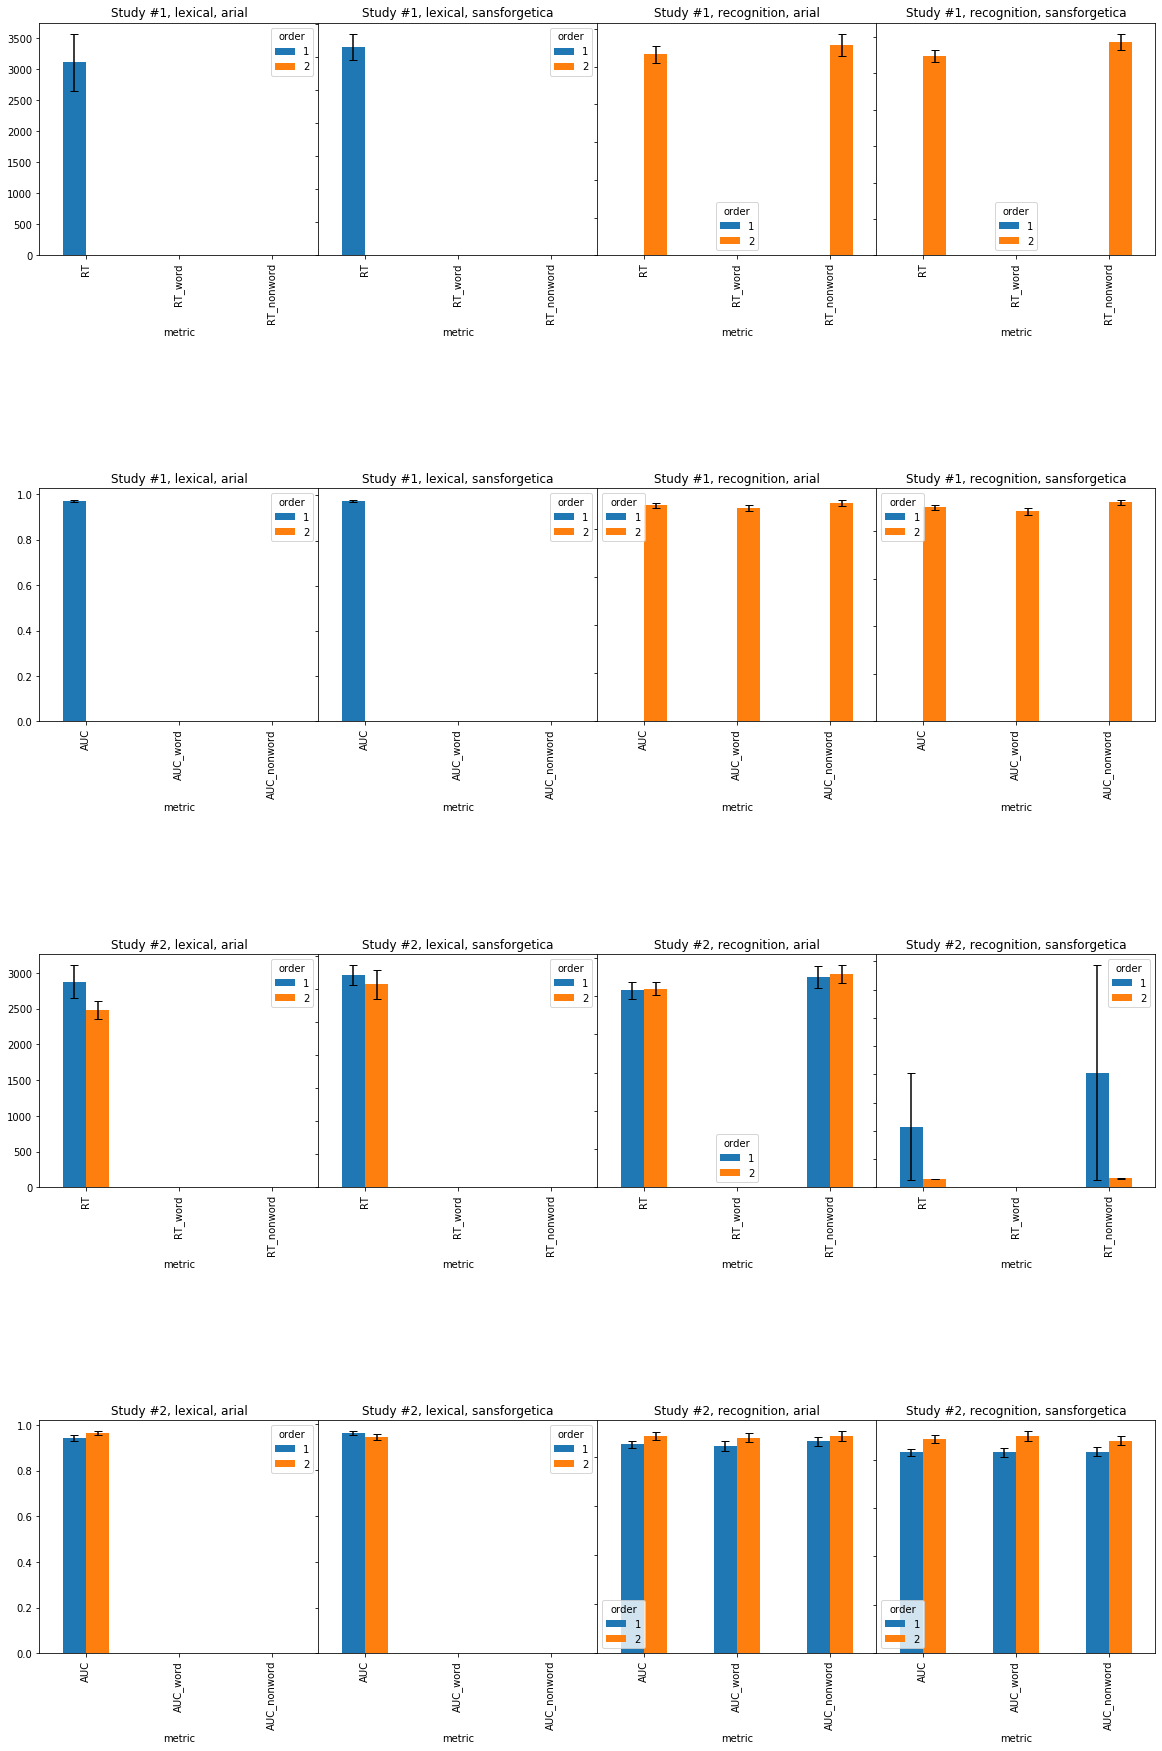

In [9]:
# comparison by order - charts

res_ = res.reorder_levels([2, 1, 0], axis=1).copy()
fig, axes = plt.subplots(4, 4, figsize=(20, 30))
plt.subplots_adjust(wspace=0, hspace=1)

res_ = res_.T.unstack()

combinations = [(t, f) for t in types for f in fonts]

for sid in [1, 2]:
    for i, (t, font) in enumerate(combinations):
        line = (sid - 1) * 2
        combo = (sid, t, font)
        means = res_.loc[("mean", ), combo].loc[RTs]
        errors = res_.loc[("SEM", ), combo].loc[RTs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)
        means = res_.loc[("mean", ), combo].loc[AUCs]
        errors = res_.loc[("SEM", ), combo].loc[AUCs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line+1][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)

path = os.path.join("..", "data", "results", "means-by-order.pdf")
fig.savefig(path)
print("Saved to:", path)

In [10]:
# comparison by order (simpler)

cols = pd.MultiIndex.from_product([[1, 2], metrics, ["mean", "SEM"]], names=["order", "metric", "stat"])
ix = pd.MultiIndex.from_product([[1, 2], types], names=["sid", "type"])
res = pd.DataFrame(columns=cols, index=ix)

for sid, t in res.index:
    for order in [1, 2]:
        r = st[(st["Order"] == order) & (st["Type"] == t) & (st["StudyID"] == sid)]
        for metric in metrics:
            res.loc[(sid, t), (order, metric, "mean")] = r[metric].mean()
            res.loc[(sid, t), (order, metric, "SEM")] = r[metric].sem()
display(res)
path = os.path.join("..", "data", "results", "means-by-order_simpler.csv")
res.to_csv(path)
print("Saved to:", path)

order                  1                                                    \
metric                RT          RT_word      RT_nonword              AUC   
stat                mean      SEM    mean  SEM       mean    SEM      mean   
sid type                                                                     
1   lexical      3129.11  251.875     NaN  NaN        NaN    NaN  0.974923   
    recognition      NaN      NaN     NaN  NaN        NaN    NaN       NaN   
2   lexical      3041.25  137.684     NaN  NaN        NaN    NaN  0.952295   
    recognition  11892.3  9324.39     NaN  NaN    21392.9  18651  0.840164   

order                                            ...       2                  \
metric                      AUC_word             ... RT_word      RT_nonword   
stat                    SEM     mean        SEM  ...    mean  SEM       mean   
sid type                                         ...                           
1   lexical      0.00330599      NaN        NaN  ...     NaN  NaN        NaN   
    recognition         NaN      NaN        NaN  ...     NaN  NaN    2860.26   
2   lexical      0.00818185      NaN        NaN  ...     NaN  NaN        NaN   
    recognition    0.011147  0.83709  0.0136741  ...     NaN  NaN    3015.83   

order                                                                 \
metric                         AUC              AUC_word               
stat                 SEM      mean         SEM      mean         SEM   
sid type                                                               
1   lexical          NaN       NaN         NaN       NaN         NaN   
    recognition  92.5757  0.900532  0.00744519  0.886598  0.00971855   
2   lexical          NaN  0.954467  0.00859465       NaN         NaN   
    recognition  103.837  0.885246   0.0114315  0.887807    0.013667   

order                                   
metric          AUC_nonword             
stat                   mean        SEM  
sid type                                
1   lexical             NaN        NaN  
    recognition    0.916559  0.0084643  
2   lexical             NaN        NaN  
    recognition    0.880891  0.0133713  

[4 rows x 24 columns]

Saved to: ../data/results/means-by-order_simpler.csv


Saved to: ../data/results/means-by-order_simpler.pdf


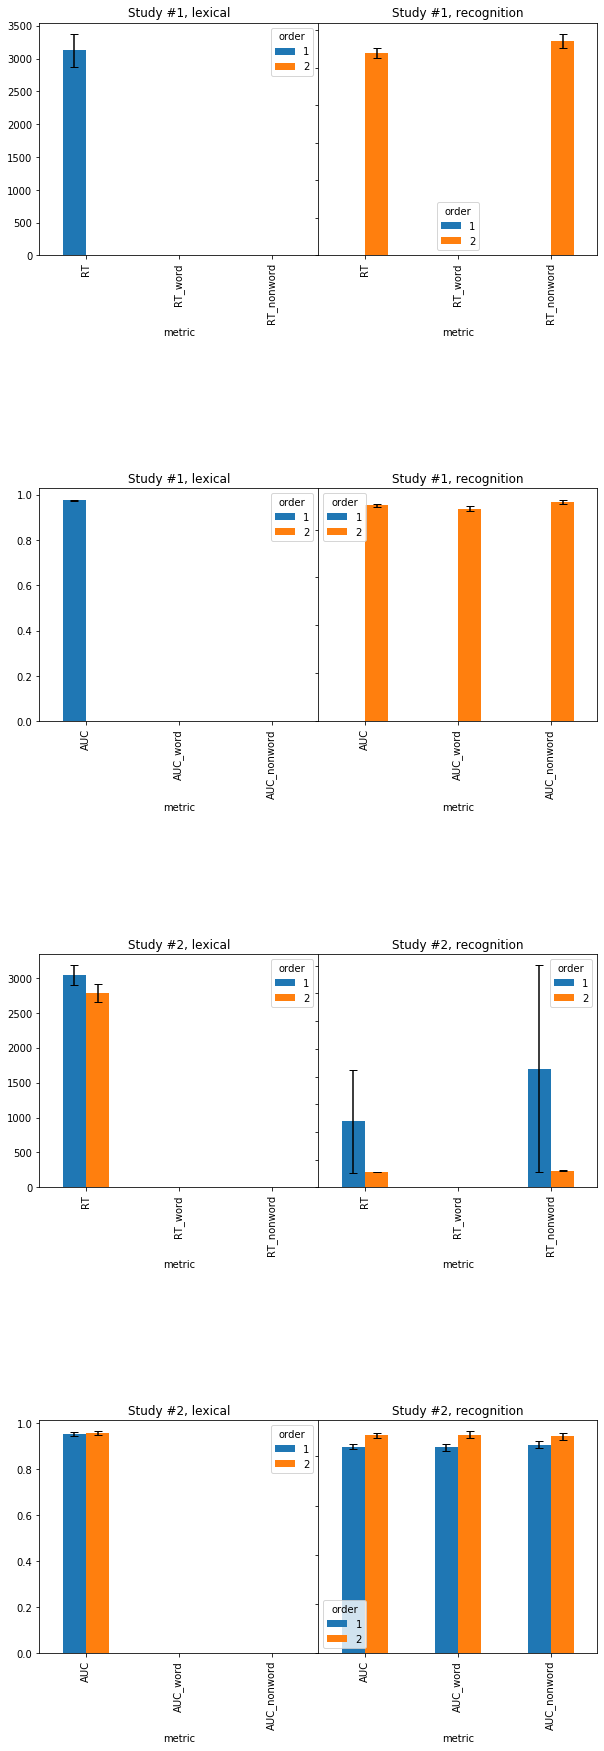

In [11]:
# comparison by order (simpler) - charts

res_ = res.reorder_levels([2, 1, 0], axis=1).copy()
fig, axes = plt.subplots(4, 2, figsize=(10, 30))
plt.subplots_adjust(wspace=0, hspace=1)

res_ = res_.T.unstack()

for sid in [1, 2]:
    for i, t in enumerate(types):
        line = (sid - 1) * 2
        combo = (sid, t)
        means = res_.loc[("mean", ), combo].loc[RTs]
        errors = res_.loc[("SEM", ), combo].loc[RTs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line][i],
                       sharey=True,
                       title="Study #%d, %s" % combo)
        means = res_.loc[("mean", ), combo].loc[AUCs]
        errors = res_.loc[("SEM", ), combo].loc[AUCs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line+1][i],
                       sharey=True,
                       title="Study #%d, %s" % combo)

path = os.path.join("..", "data", "results", "means-by-order_simpler.pdf")
fig.savefig(path)
print("Saved to:", path)

In [12]:
# comparison by first font

cols = pd.MultiIndex.from_product([["arial", "sansforgetica"], metrics, ["mean", "SEM"]], names=["first", "metric", "stat"])
ix = pd.MultiIndex.from_product([[1, 2], types, fonts], names=["sid", "type", "font"])
res = pd.DataFrame(columns=cols, index=ix)

for sid, t, font in res.index:
    for first in ["arial", "sansforgetica"]:
        r = st[(st["Firstfont"] == first) & (st["Font"] == font) & (st["Type"] == t) & (st["StudyID"] == sid)]
        for metric in metrics:
            res.loc[(sid, t, font), (first, metric, "mean")] = r[metric].mean()
            res.loc[(sid, t, font), (first, metric, "SEM")] = r[metric].sem()
display(res)
path = os.path.join("..", "data", "results", "means-by-first-font.csv")
res.to_csv(path)
print("Saved to:", path)

first                            arial                                   \
metric                              RT          RT_word      RT_nonword   
stat                              mean      SEM    mean  SEM       mean   
sid type        font                                                      
1   lexical     arial          3857.29  886.226     NaN  NaN        NaN   
                sansforgetica  3169.08  150.614     NaN  NaN        NaN   
    recognition arial          2981.43   183.76     NaN  NaN    3205.61   
                sansforgetica  2707.81  131.852     NaN  NaN    2847.37   
2   lexical     arial          2873.62  229.907     NaN  NaN        NaN   
                sansforgetica  3078.27  219.225     NaN  NaN        NaN   
    recognition arial          2573.31   109.73     NaN  NaN    2747.83   
                sansforgetica  2943.54  111.504     NaN  NaN    3239.86   

first                                                                   \
metric                                       AUC              AUC_word   
stat                               SEM      mean         SEM      mean   
sid type        font                                                     
1   lexical     arial              NaN    0.9605  0.00830325       NaN   
                sansforgetica      NaN    0.9712   0.0072921       NaN   
    recognition arial          262.799  0.900937   0.0166208  0.886875   
                sansforgetica  158.469   0.88875   0.0157719   0.87625   
2   lexical     arial              NaN  0.943871   0.0139929       NaN   
                sansforgetica      NaN  0.944677   0.0150738       NaN   
    recognition arial          146.378  0.850806   0.0156175  0.844254   
                sansforgetica  168.026  0.886215   0.0159891  0.896673   

first                                     ... sansforgetica                  \
metric                                    ...       RT_word      RT_nonword   
stat                                 SEM  ...          mean  SEM       mean   
sid type        font                      ...                                 
1   lexical     arial                NaN  ...           NaN  NaN        NaN   
                sansforgetica        NaN  ...           NaN  NaN        NaN   
    recognition arial            0.01763  ...           NaN  NaN    2341.12   
                sansforgetica  0.0176316  ...           NaN  NaN    3025.71   
2   lexical     arial                NaN  ...           NaN  NaN        NaN   
                sansforgetica        NaN  ...           NaN  NaN        NaN   
    recognition arial          0.0192894  ...           NaN  NaN    2784.33   
                sansforgetica  0.0193175  ...           NaN  NaN    40659.5   

first                                                                   \
metric                                       AUC              AUC_word   
stat                               SEM      mean         SEM      mean   
sid type        font                                                     
1   lexical     arial              NaN  0.985106  0.00370167       NaN   
                sansforgetica      NaN  0.984043  0.00529132       NaN   
    recognition arial          96.7913  0.896941   0.0129814  0.890293   
                sansforgetica  152.042  0.916223    0.013699  0.893617   
2   lexical     arial              NaN  0.964583  0.00786565       NaN   
                sansforgetica      NaN     0.961  0.00821223       NaN   
    recognition arial          114.068  0.884245   0.0164857  0.878646   
                sansforgetica  37923.6  0.829167   0.0159228  0.829688   

first                                                            
metric                                   AUC_nonword             
stat                                 SEM        mean        SEM  
sid type        font                                             
1   lexical     arial                NaN         NaN        NaN  
                sansforgetica        NaN  

Saved to: ../data/results/means-by-first-font.csv


Saved to: ../data/results/means-by-first-font.pdf


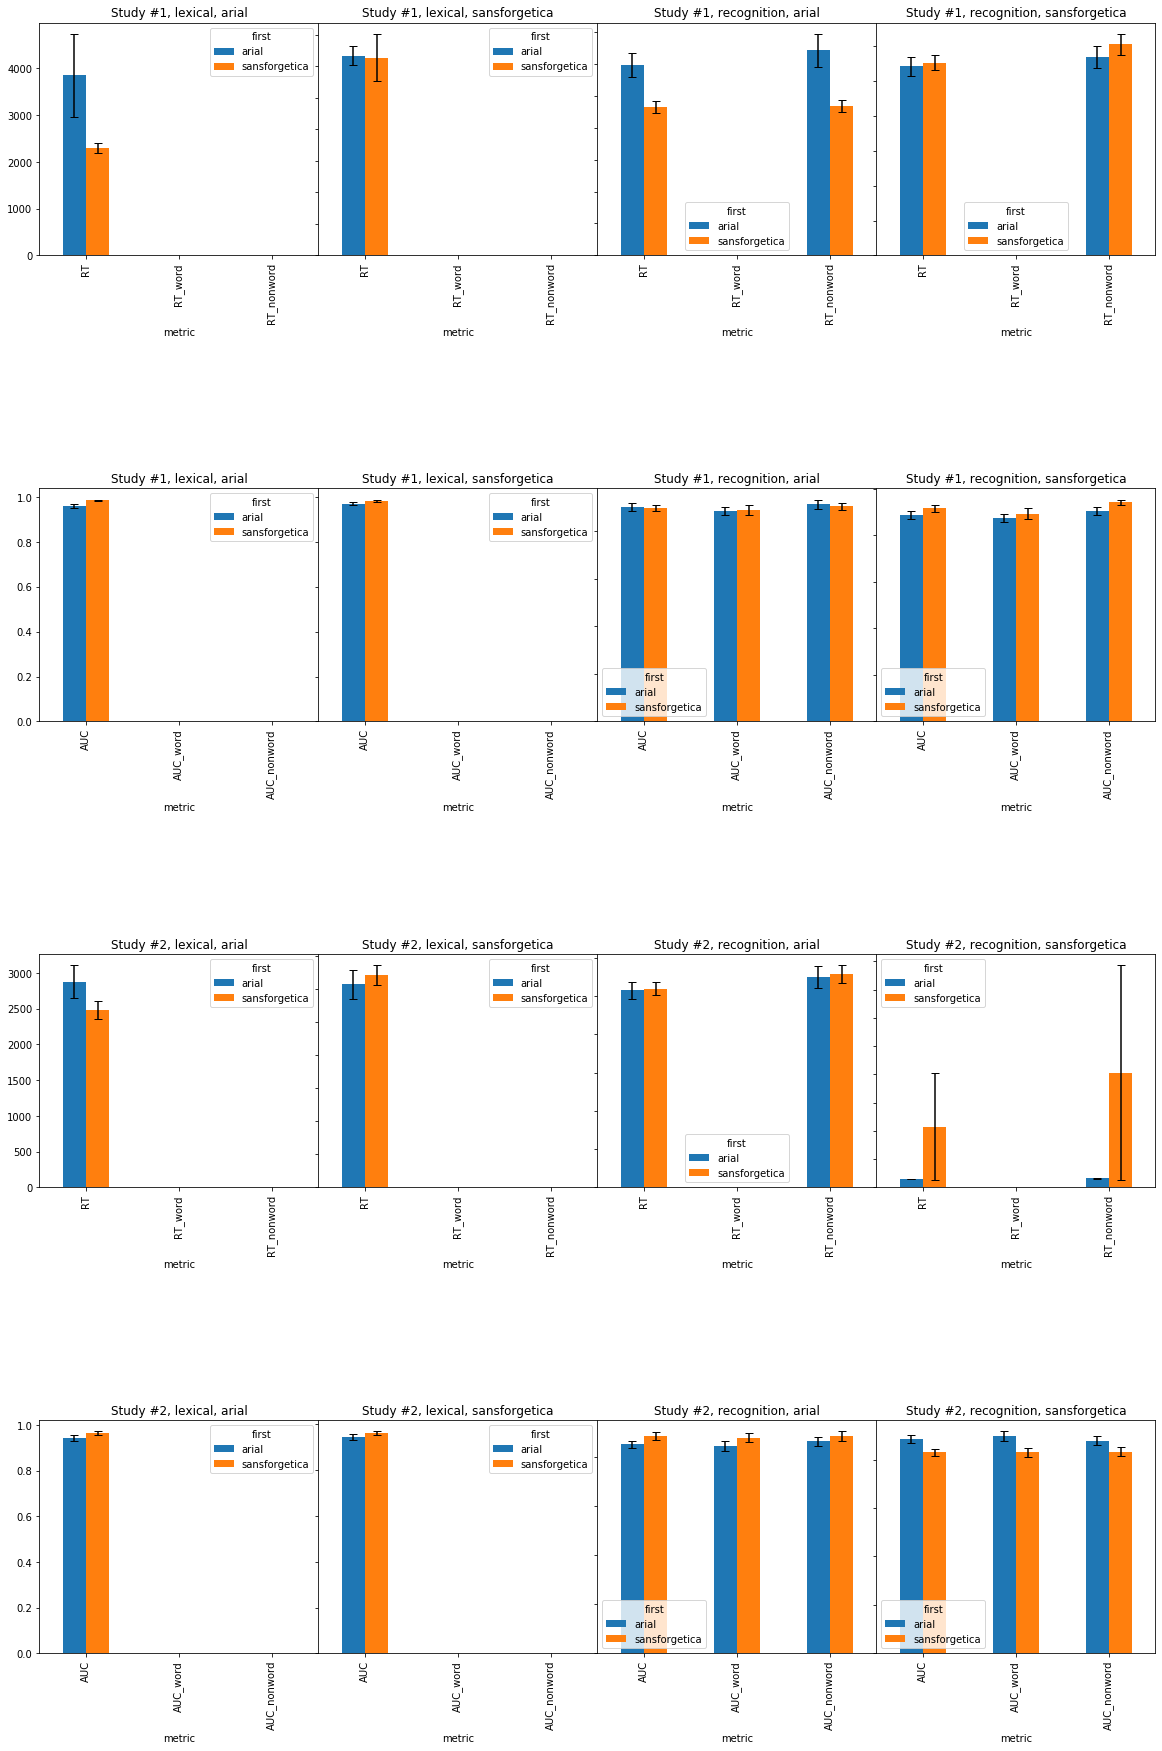

In [13]:
# comparison by first font - charts

res_ = res.reorder_levels([2, 1, 0], axis=1).copy()
fig, axes = plt.subplots(4, 4, figsize=(20, 30))
plt.subplots_adjust(wspace=0, hspace=1)

res_ = res_.T.unstack()

combinations = [(t, f) for t in types for f in fonts]

for sid in [1, 2]:
    for i, (t, font) in enumerate(combinations):
        line = (sid - 1) * 2
        combo = (sid, t, font)
        means = res_.loc[("mean", ), combo].loc[RTs]
        errors = res_.loc[("SEM", ), combo].loc[RTs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)
        means = res_.loc[("mean", ), combo].loc[AUCs]
        errors = res_.loc[("SEM", ), combo].loc[AUCs]
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[line+1][i],
                       sharey=True,
                       title="Study #%d, %s, %s" % combo)

path = os.path.join("..", "data", "results", "means-by-first-font.pdf")
fig.savefig(path)
print("Saved to:", path)

# isDesigner



JoM                                                        \
            count       mean        std   min    25%   50%   75%    max   
isDesigner                                                                
False       176.0  53.977273  20.943449   1.0  40.75  50.0  71.5   92.0   
True        212.0  55.537736  21.664908  10.0  37.00  59.0  73.0  100.0   

              JoL                                                       
            count       mean        std  min   25%   50%    75%    max  
isDesigner                                                              
False       176.0  69.886364  30.509739  0.0  50.0  75.0  100.0  100.0  
True        212.0  62.500000  32.518679  0.0  25.0  50.0  100.0  100.0


# Font



JoM                                                      \
               count       mean        std  min   25%   50%   75%    max   
Font                                                                       
arial          194.0  56.711340  20.763139  1.0  47.0  59.0  73.0   92.0   
sansforgetica  194.0  52.948454  21.768148  7.0  35.0  50.0  71.0  100.0   

                 JoL                                                         
               count       mean        std   min   25%    50%    75%    max  
Font                                                                         
arial          194.0  90.463918  17.426121  25.0  75.0  100.0  100.0  100.0  
sansforgetica  194.0  41.237113  22.488119   0.0  25.0   50.0   50.0  100.0


# Firstfont



JoM                                                       \
               count       mean        std   min   25%   50%   75%    max   
Firstfont                                                                   
arial          200.0  55.380000  23.318541   1.0  38.0  59.0  75.0  100.0   
sansforgetica  188.0  54.244681  19.026964  14.0  41.0  50.0  70.0   90.0   

                 JoL                                                       
               count       mean        std  min   25%   50%    75%    max  
Firstfont                                                                  
arial          200.0  62.250000  33.530718  0.0  25.0  50.0  100.0  100.0  
sansforgetica  188.0  69.680851  29.449572  0.0  50.0  75.0  100.0  100.0


# isDesigner



JoM                                                       JoL  \
            count       mean       std  min   25%   50%   75%    max  count   
isDesigner                                                                    
False       236.0  52.237288  20.82988  6.0  37.0  50.0  70.0  100.0  236.0   
True        252.0  55.738095  19.69617  5.0  43.0  52.5  70.0  100.0  252.0   

                                                                 
                 mean        std  min   25%   50%    75%    max  
isDesigner                                                       
False       68.855932  32.278120  0.0  50.0  75.0  100.0  100.0  
True        65.079365  30.773457  0.0  25.0  75.0  100.0  100.0


# Font



JoM                                                     \
               count       mean       std  min   25%   50%   75%    max   
Font                                                                      
arial          244.0  54.045082  20.32802  5.0  40.0  50.0  70.0  100.0   
sansforgetica  244.0  54.045082  20.32802  5.0  40.0  50.0  70.0  100.0   

                 JoL                                                       
               count       mean        std  min   25%   50%    75%    max  
Font                                                                       
arial          244.0  66.905738  31.566693  0.0  50.0  75.0  100.0  100.0  
sansforgetica  244.0  66.905738  31.566693  0.0  50.0  75.0  100.0  100.0


# Firstfont



JoM                                                       \
               count       mean        std  min   25%   50%    75%    max   
Firstfont                                                                   
arial          248.0  52.975806  20.412532  7.0  37.0  50.0  70.00  100.0   
sansforgetica  240.0  55.150000  20.180628  5.0  44.5  52.5  69.25  100.0   

                 JoL                                                       
               count       mean        std  min   25%   50%    75%    max  
Firstfont                                                                  
arial          248.0  62.096774  32.519672  0.0  25.0  50.0  100.0  100.0  
sansforgetica  240.0  71.875000  29.741301  0.0  50.0  75.0  100.0  100.0

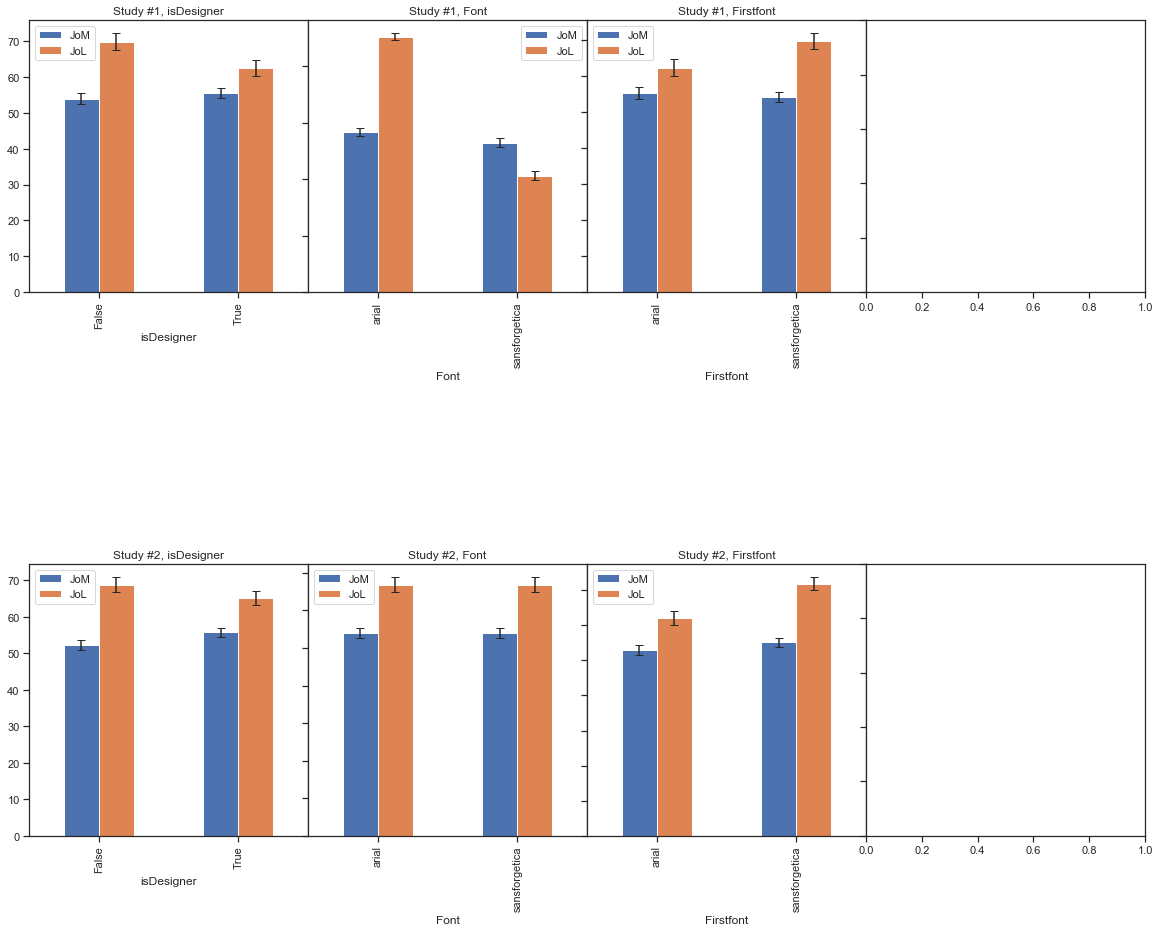

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
plt.subplots_adjust(wspace=0, hspace=1)
for sid in [1, 2]:
    for i, col in enumerate(["isDesigner", "Font", "Firstfont"]):
        print("#", col)
        print()
        display(st[st["StudyID"] == sid].groupby([col])["JoM", "JoL"].describe())
        print()
        means = st[st["StudyID"] == sid].groupby([col])["JoM", "JoL"].mean()
        errors = st[st["StudyID"] == sid].groupby([col])["JoM", "JoL"].sem()
        means.plot.bar(yerr=errors,
                       capsize=4,
                       ax=axes[sid-1][i],
                       sharey=True,
                       title="Study #%d, %s" % (sid, col))

path = os.path.join("..", "data", "results", "results/JoM-JoL.pdf")
fig.savefig(path)
print("Saved to:", path)